In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_curve, auc, f1_score, roc_auc_score

In [2]:
# import dataset
xTrain = pd.read_csv("xTrain.csv")
yTrain = pd.read_csv("yTrain_discrete.csv")
xTest = pd.read_csv("xTest.csv")
yTest = pd.read_csv("yTest_discrete.csv")

In [3]:
## hyper parameter tuning manually

# for kernal
k_fold = KFold(n_splits=3, shuffle=True, random_state=334)

kernals = ["linear", "rbf", "poly", "sigmoid"]

for k in kernals:
    acc_scores = []
    for train_index, validation_index in k_fold.split(xTrain):
        cur_model = SVC(kernel=k, C=1)
        cur_model.fit(xTrain.iloc[train_index], np.ravel(yTrain.iloc[train_index]))
        acc_scores.append(cur_model.score(xTrain.iloc[validation_index], np.ravel(yTrain.iloc[validation_index])))
    print("Kernal: ", k)
    print("Accuracy: ", np.mean(acc_scores))

Kernal:  linear
Accuracy:  0.6141331714249473
Kernal:  rbf
Accuracy:  0.6164982722865426
Kernal:  poly
Accuracy:  0.6069702753022758
Kernal:  sigmoid
Accuracy:  0.5325116892600531


In [ ]:
# for the soft margin
k_fold = KFold(n_splits=3, shuffle=True, random_state=334)

soft_margins = [0.1, 1, 10, 20]

avg_accuracies = []
for soft_margin in soft_margins:
    acc_scores = []
    for train_index, validation_index in k_fold.split(xTrain):
        cur_model = SVC(kernel="linear", C=soft_margin)
        cur_model.fit(xTrain.iloc[train_index], np.ravel(yTrain.iloc[train_index]))
        acc_scores.append(cur_model.score(xTrain.iloc[validation_index], np.ravel(yTrain.iloc[validation_index])))
    avg_accuracy = np.mean(acc_scores)
    avg_accuracies.append(avg_accuracy)
    print("Soft margin: ", soft_margin)
    print("Accuracy: ", avg_accuracy)

plt.plot(soft_margins, avg_accuracies)
plt.xlabel("Soft Margin Values")
plt.ylabel("Accuracy of Validation Dataset")
plt.show


Soft margin:  0.1
Accuracy:  0.6141078312328686
Soft margin:  1
Accuracy:  0.6141331714249473
Soft margin:  10
Accuracy:  0.6141416181556402
Soft margin:  20
Accuracy:  0.6141331709968528


In [6]:
# train the support vector machine model with the optimal hyper parameters: kernal = "linear", soft margin = 15
clf = SVC(kernel="rbf", C=10)
clf.fit(xTrain, yTrain.values.ravel())
# get the accuracy on the training dataset
acc = clf.score(xTrain, yTrain)
print("Training accuracy with optimal hyper parameter: ", acc)
# predict on test dataset
acc = clf.score(xTest, yTest)
print("Test accuracy with optimal hyper parameter: ", acc)

Training accuracy with optimal hyper parameter:  0.6218789066459438
Test accuracy with optimal hyper parameter:  0.6027096425434151


In [7]:
# Evaluation
y_proba = clf.decision_function(xTest)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(yTest, y_proba)
roc_auc = auc(fpr, tpr)

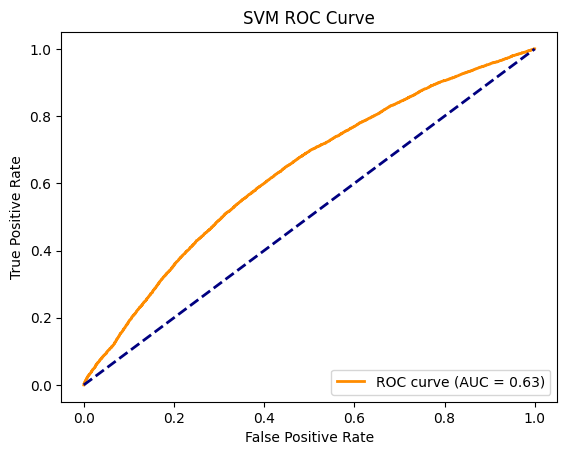

AUC: 0.6315498771439219


In [8]:
# Plot ROC curve
plt.plot(fpr, tpr, color="darkorange", lw=2, label="ROC curve (AUC = {:.2f})".format(roc_auc))
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("SVM ROC Curve")
plt.legend(loc="lower right")
plt.show()

# Calculate AUC
print("AUC:", roc_auc)

In [6]:
# Predict on test dataset
yHat = clf.predict(xTest)

# Calculate F1 score
f1 = f1_score(yTest, yHat)
print("F1 Score:", f1)

F1 Score: 0.6464415646892571


In [ ]:
# Grid Search
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly']
}
model = SVC()
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(xTrain, yTrain.values.ravel())

best_params = grid_search.best_params_
print(best_params)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(xTest)

accuracy = accuracy_score(yTest, y_pred)
print("Accuracy:", accuracy)

# Calculate F1 score
f1 = f1_score(yTest, y_pred)
print("F1 Score:", f1)

# Evaluation
y_proba = model.predict_proba(xTest)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(yTest, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color="darkorange", lw=2, label="ROC curve (AUC = {:.2f})".format(roc_auc))
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("SVM ROC Curve")
plt.legend(loc="lower right")
plt.show()

# Calculate AUC
print("AUC:", roc_auc)